<a href="https://colab.research.google.com/github/THATIKONDASWATHISRI/Projects/blob/main/Copy_of_TASK_3_IRIS_FLOWER_CLASSIFICATION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving IRIS.csv to IRIS.csv


In [ ]:
# Linking dataset into colab
import io
iris = pd.read_csv((io.BytesIO(uploaded['IRIS.csv'])))

In [ ]:
# Dataset First Look
iris.head(20)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
5,5.4,3.9,1.7,0.4,0
6,4.6,3.4,1.4,0.3,0
7,5.0,3.4,1.5,0.2,0
8,4.4,2.9,1.4,0.2,0
9,4.9,3.1,1.5,0.1,0


In [ ]:
iris.shape

(150, 5)

In [ ]:
# Checking the null values
iris.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [ ]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [ ]:
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [ ]:
# Importing Libraries Used For Encoding

from sklearn.preprocessing import LabelEncoder
from pandas.core.dtypes.common import is_numeric_dtype
le = LabelEncoder()

In [ ]:
for i in iris.columns:
  if is_numeric_dtype(iris[i]):
    continue
  else:
      iris[i] = le.fit_transform(iris[i])

In [ ]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


<Axes: xlabel='sepal_length', ylabel='Count'>

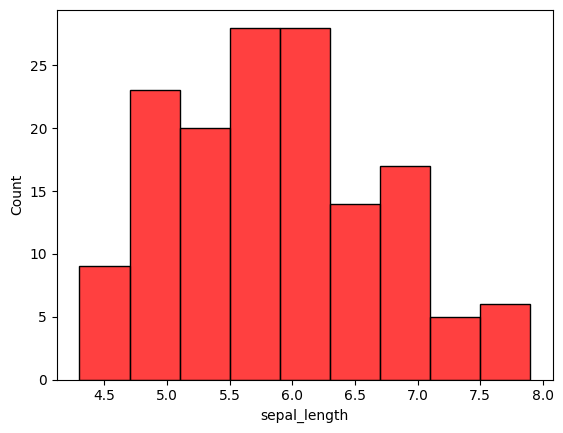

In [ ]:
# Built a histogram for sepal_length data to know the relation
sns.histplot(data = iris, x = iris.sepal_length, color = 'red')

<Axes: xlabel='sepal_width', ylabel='Count'>

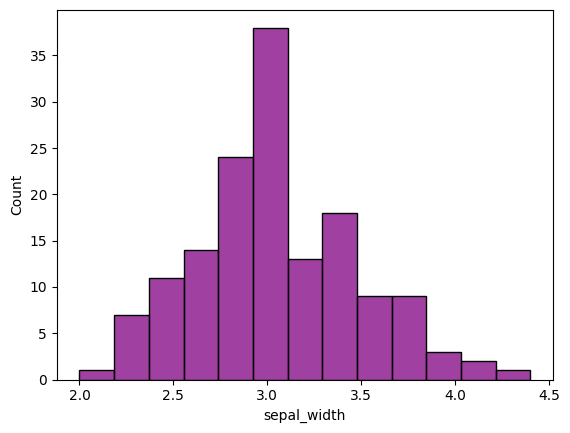

In [ ]:
# Built a histogram for sepal_width data to know the relation
sns.histplot(data = iris, x = iris.sepal_width, color = 'purple')

<Axes: xlabel='petal_length', ylabel='Count'>

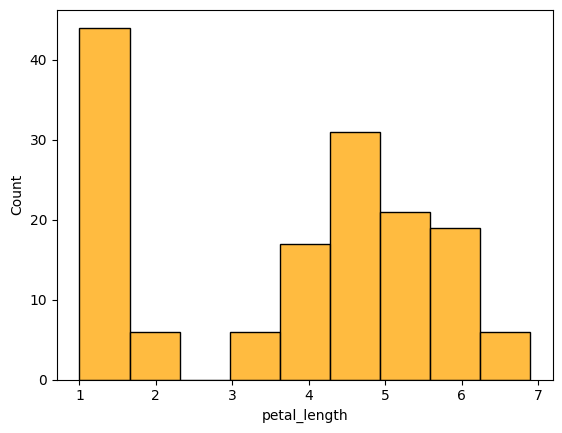

In [ ]:
# Built a histogram for petal_length data to know the relation
sns.histplot(data = iris, x = iris.petal_length, color = 'orange')

<Axes: xlabel='petal_width', ylabel='Count'>

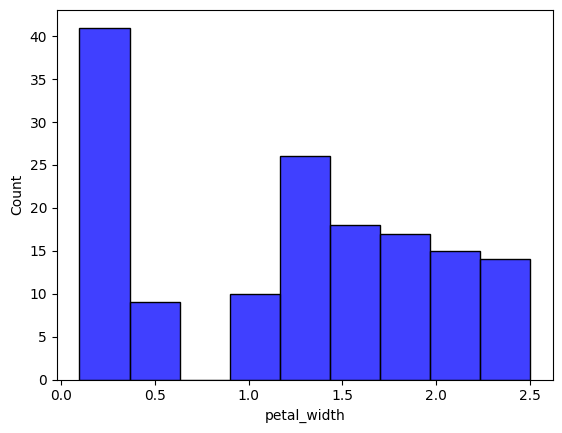

In [ ]:
# Built a histogram for petal_width data to know the relation
sns.histplot(data = iris, x = iris.petal_width, color = 'blue')

<Axes: >

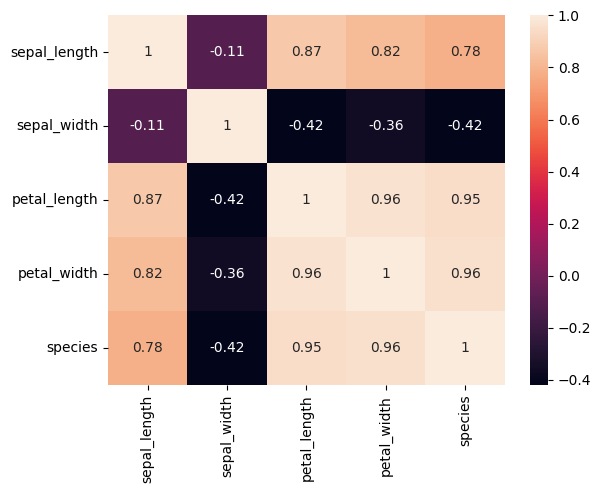

In [ ]:
# Create a heatmap to see the feature-wise correlation in the dataset

corr = iris.corr()
sns.heatmap(corr, annot = True)

In [ ]:
# Data Preprocessing

from sklearn.model_selection import train_test_split
iris.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [ ]:
# Assigning the predictor and target variable

x = iris.drop(['species'],axis=1)
y = iris.species
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3)

In [ ]:
# Model Building
# Importing essential libraries for model building

from sklearn.linear_model import LogisticRegression

In [ ]:
# Building machine learning model and training true

Model = LogisticRegression()
Model.fit(x_train,y_train)

LogisticRegression()

In [ ]:
# Evaluating the model to verify the accuracy

print("Score for Train data",Model.score(x_train,y_train))
print("Score for Test data",Model.score(x_test,y_test))

Score for Train data 1.0
Score for Test data 0.9111111111111111


In [ ]:
# Importing essential libraries for Random Forest Classifier

from sklearn.ensemble import RandomForestClassifier

In [ ]:
# Building machine learning model and training them

Model2 = RandomForestClassifier(n_estimators = 200 , random_state = 100)
Model2.fit(x_train,y_train)

RandomForestClassifier(n_estimators=200, random_state=100)

In [ ]:
#Evaluating the model to verify the accuracy

print("Score for Train data",Model2.score(x_train,y_train))
print("Score for Test data",Model2.score(x_test,y_test))

Score for Train data 1.0
Score for Test data 0.9333333333333333


In [ ]:
# Knn k-nearest neighbours
from sklearn.neighbors import KNeighborsClassifier

# Building machine learning model and training them

Model3 = KNeighborsClassifier()
Model3.fit(x_train,y_train)

KNeighborsClassifier()

In [ ]:
# Evaluating the model to verify the accuracy

print("Score fo train data",Model3.score(x_train,y_train))
print("score for Test data",Model3.score(x_test,y_test))

Score fo train data 1.0
score for Test data 0.9333333333333333


In [ ]:
# Model Testing

iris.head(5)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [ ]:
# For Testung We Create A New Dataframe With Values Close To The Any Of Our Existing Data To Evaluate

data = {'sepal_length':[5.2], 'sepal_width':[3.6], 'petal_length':[1.4], 'petal_width':[0.2]}
total = pd.DataFrame(data)

In [ ]:
# Predict The Movie Rating By Entering Data
result = Model.predict(total)

# Display The Predicted Result From The Model
print("Result Species:", result[0])

Result Species: 0
